### **Support Vector Machines (SVM)**

### 1. Introduction and Core SVM Concepts

* We will use the Support Vector Machine (SVM) algorithm to classify handwritten digits (0-9) using the `load_digits` dataset from scikit-learn. 

* This is a multi-class classification problem where each image is represented by a set of pixel values.

#### **What is a Support Vector Machine?**

* A Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification problems. 

* The main idea behind SVM is to find the optimal hyperplane that best separates different classes in the feature space.

**Key Concepts:**

![SVM_Hyperplan](SVM_Hyperplane.png)

- **Hyperplane:** A hyperplane is a decision boundary that helps classify data points. 
  
  * In a 2-dimensional space, the hyperplane is a line. 
  
  * For a 3-dimensional space, it is a 2-dimensional plane. 
  
  * In higher dimensions, it's a subspace with one dimension less than the input space.
  
- **Support Vectors:** These are the data points closest to the hyperplane. 
  
  * They are the most critical elements in the dataset because they directly influence the position and orientation of the hyperplane. 
  
  * Moving or removing a support vector would change the decision boundary, while moving other data points would not.

- **Margin:** The margin is the distance between the hyperplane and the nearest data points from each class. 
  
  * The goal of the SVM algorithm is to find the hyperplane with the maximum margin. 
  
  * A larger margin generally leads to better generalization and a more robust classifier.

- **Kernels (The Kernel Trick):** SVM can handle both linearly separable and non-linearly separable data.   

  * For non-linearly separable data, SVM uses a technique called the "kernel trick." 

  * This method implicitly maps the original data points into a higher-dimensional feature space where they can be linearly separated by a hyperplane. 

  * The kernel function computes the dot product of the data points in the transformed space without explicitly performing the transformation, which is computationally efficient.
  
    
  * Commonly used kernels include:
  
    - **Linear Kernel:** Suitable for linearly separable data.
  
    - **Polynomial Kernel:** Creates a curved decision boundary.
  
    - **Radial Basis Function (RBF) or Gaussian Kernel:** A popular choice for complex, non-linear datasets.

---

### 2. Import Libraries and Load Dataset

* We'll use `pandas` for data handling, `numpy` for numerical operations, `matplotlib` and `seaborn` for visualization. 

* Finally, `sklearn` for loading the dataset and building the SVM model.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the digits dataset
digits = load_digits()

In [3]:
# Check the attributes of the digits dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# Check the shape of the digits dataset
digits.data.shape

(1797, 64)

In [5]:
# Display the shape of the first image in the dataset
digits.images[0].shape

(8, 8)

In [6]:
# Display the target names
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# Display the first image in the dataset
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

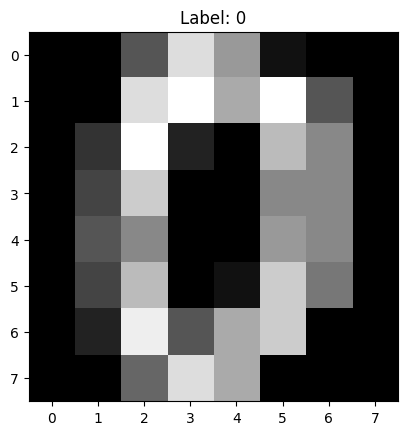

In [8]:
# Display the first image in the dataset
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.show()

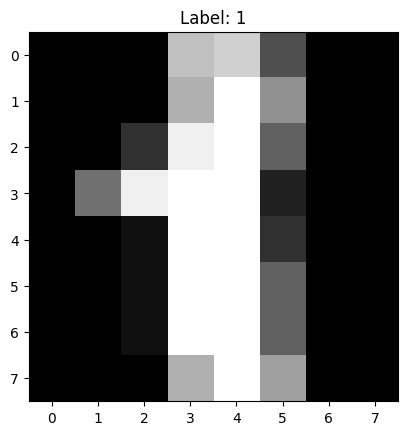

In [9]:
# Display the second image in the dataset
plt.imshow(digits.images[1], cmap='gray')
plt.title(f"Label: {digits.target[1]}")
plt.show()

In [10]:
# Prepare the data for modeling
X = pd.DataFrame(digits.data, columns=digits.feature_names)
y = pd.Series(digits.target)

In [11]:
X.shape, y.shape

((1797, 64), (1797,))

In [12]:
# Display the features and first few rows
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
print("\nNumber of samples for each digit:")
y.value_counts().sort_index()


Number of samples for each digit:


0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64

### 3. Split Data into Training and Testing Sets

* To evaluate our model's performance, we need to split the dataset into training and testing sets. 

* This allows us to train the model on one portion of the data and then test its accuracy on unseen data. 

* A standard split is 80% for training and 20% for testing.

In [14]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Create and Train the SVM Model with a Linear Kernel

We'll start with a simple `linear` kernel to see how it performs on this multi-class dataset.

In [15]:
# Create an SVM model with a linear kernel
linear_model = SVC(kernel='linear')

# Train the model
linear_model.fit(X_train, y_train)

SVC(kernel='linear')

### 5. Evaluate the Linear Model's Performance

We evaluate the model using accuracy, a confusion matrix, and a classification report.

In [16]:
# Predict and evaluate the linear model
y_pred_linear = linear_model.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f'Linear Kernel Accuracy: {accuracy_linear:.2f}')

Linear Kernel Accuracy: 0.98


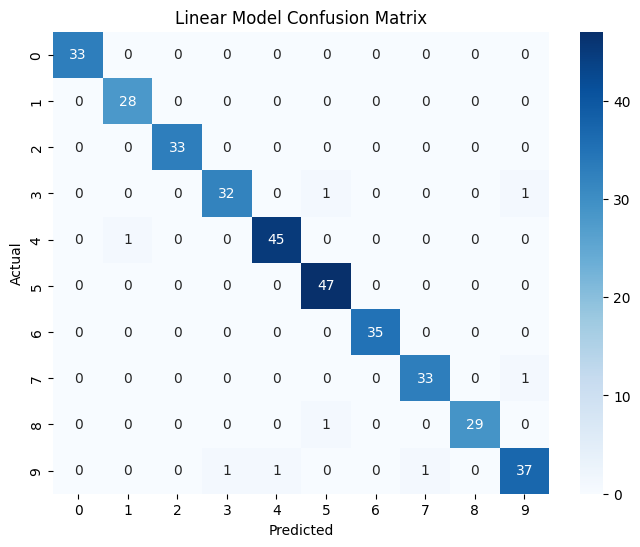

In [17]:
# Compute confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Model Confusion Matrix')
plt.show()

In [18]:
print('\nClassification Report (Linear Kernel):\n')
print(classification_report(y_test, y_pred_linear))


Classification Report (Linear Kernel):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### 6. Create and Train the SVM Model with an RBF Kernel

* Given the non-linear nature of pixel data, an RBF kernel is often a more powerful choice. 

* We will use the default parameters for now.

In [19]:
# Create an SVM model with an RBF kernel
rbf_model = SVC(kernel='rbf')

# Train the model
rbf_model.fit(X_train, y_train)

SVC()

### 7. Evaluate the RBF Model's Performance

* We evaluate the model using accuracy, a confusion matrix, and a classification report.

In [20]:
# Predict and evaluate the RBF model
y_pred_rbf = rbf_model.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'RBF Kernel Accuracy: {accuracy_rbf:.2f}')


RBF Kernel Accuracy: 0.99


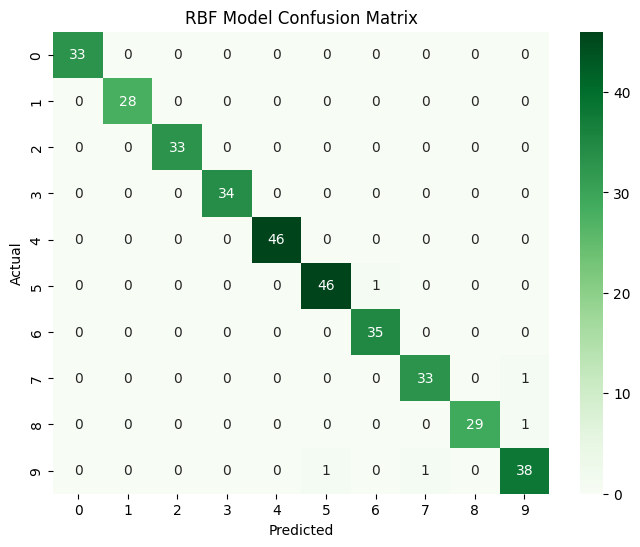

In [21]:
# Compute confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RBF Model Confusion Matrix')
plt.show()



In [22]:
print('\nClassification Report (RBF Kernel):\n')
print(classification_report(y_test, y_pred_rbf))


Classification Report (RBF Kernel):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### 8. Hyperparameter Tuning with RBF Kernel

* We can try to improve our model's performance by tuning its hyperparameters, primarily `C` and `gamma`. 

* A higher `C` and a higher `gamma` can lead to more complex decision boundaries that might fit the training data better, but also risk overfitting.

In [23]:
# Train a tuned SVM model with C=10 and gamma=0.001
tuned_model = SVC(kernel='rbf', C=10, gamma=0.001)
tuned_model.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = tuned_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {accuracy_tuned:.2f}')

Tuned Model Accuracy: 0.99


In [24]:
print('\nClassification Report (Tuned Model):\n')
print(classification_report(y_test, y_pred_tuned))


Classification Report (Tuned Model):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



---

### Summary

* In this notebook, we performed an end-to-end classification task using the Support Vector Machine (SVM) algorithm on the handwritten digits dataset. 

* We started by understanding the fundamental concepts of SVM, including hyperplanes, support vectors, margins, and the kernel trick. 

* We loaded and prepared the dataset, splitting it into training and testing sets. 

* We then trained and evaluated two different SVM models: one with a **linear kernel** and one with a **Radial Basis Function (RBF) kernel**. 

* The linear kernel provided a good baseline accuracy, but the RBF kernel, which is better suited for non-linear data, yielded a significantly higher score. 

* This demonstrates the power of the kernel trick in handling complex datasets.

* Finally, we performed **hyperparameter tuning** by adjusting the `C` and `gamma` parameters of the RBF model. 

* By finding a better combination of these values, we were able to slightly improve the model's accuracy, confirming the importance of this step in optimizing SVM performance.

* This notebook showcases that SVMs are powerful and versatile classifiers, especially for problems with high-dimensional data, and that understanding and tuning kernels and hyperparameters are key to achieving optimal results.

---

#### **Exercise - Support Vector Machine (SVM) for Diabetes Prediction**

#### Problem Statement

* Develop a classification model using the Support Vector Machine (SVM) algorithm to predict whether a patient is likely to develop diabetes, based on the Pima Indians Diabetes Dataset.

#### Tasks to be Performed:

* Load and Prepare Data: Import the dataset, handle missing values, normalize features, and split into training and testing sets.

* Train SVM Models: Apply SVM with different kernel functions (e.g., linear, RBF) to build initial models.

* Evaluate and Tune the Model: Assess model performance using classification metrics.

* Perform hyperparameter tuning to improve accuracy. 

* Select Best Model. Compare results across kernels and parameters.

* Finalize the best-performing model and summarize insights.

---

* Download Dataset:  [Pima Indians Diabetes Database](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
* Solution : [Exercise - Support Vector Machine (SVM) for Diabetes Prediction](https://github.com/prakash-ukhalkar/ML/blob/main/10_Support_Vector_Machines_ML/01_Exercise_Support_Vector_Machine_ML/01_Exercise_Support_Vector_Machine_ML.ipynb)

---